In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests

def load_image_from_github(raw_url, grayscale=False):
    response = requests.get(raw_url)

    if response.status_code != 200:
        raise ValueError(f"Failed to download image. Status code: {response.status_code}")

    # Convert bytes to NumPy array
    image_bytes = np.frombuffer(response.content, np.uint8)

    # Decode image
    if grayscale:
        img = cv.imdecode(image_bytes, cv.IMREAD_GRAYSCALE)
    else:
        img = cv.imdecode(image_bytes, cv.IMREAD_COLOR)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    if img is None:
        raise ValueError("cv.imdecode failed. URL may not point to an image.")

    return img


Runway image shape: (769, 765)
Runway image dtype: uint8


(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

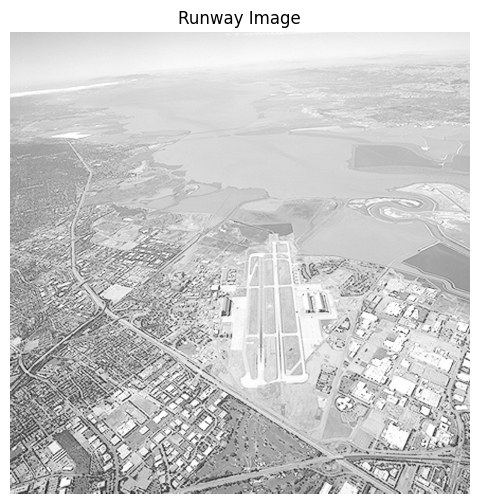

In [8]:
runway_url = "https://raw.githubusercontent.com/NalinDhanuddheera/Intensity-Transformations-and-Neighborhood-Filtering/main/data/runway.png"

runway = load_image_from_github(runway_url, grayscale=True)

print("Runway image shape:", runway.shape)
print("Runway image dtype:", runway.dtype)

plt.imshow(runway, cmap="gray")
plt.title("Runway Image")
plt.axis("off")


(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

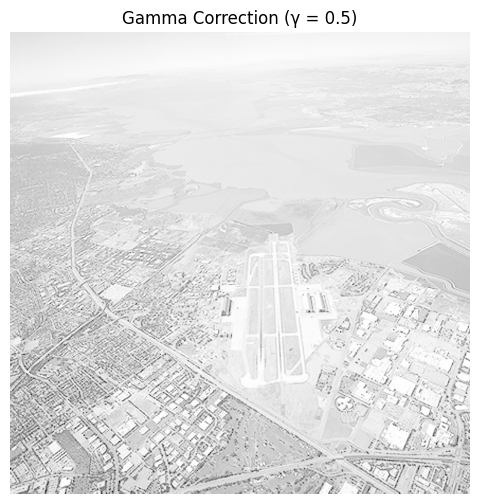

In [9]:
def gamma_correction(img, gamma):
    img_norm = img / 255.0
    corrected = np.power(img_norm, gamma)
    return (corrected * 255).astype(np.uint8)

gamma_05 = gamma_correction(runway, 0.5)

plt.imshow(gamma_05, cmap="gray")
plt.title("Gamma Correction (γ = 0.5)")
plt.axis("off")


(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

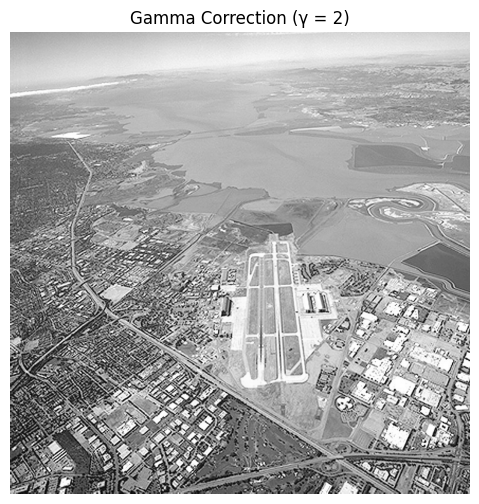

In [10]:
# Apply gamma correction with γ = 2
gamma_2 = gamma_correction(runway, 2)

# Display result
plt.imshow(gamma_2, cmap="gray")
plt.title("Gamma Correction (γ = 2)")
plt.axis("off")


(np.float64(-0.5), np.float64(764.5), np.float64(768.5), np.float64(-0.5))

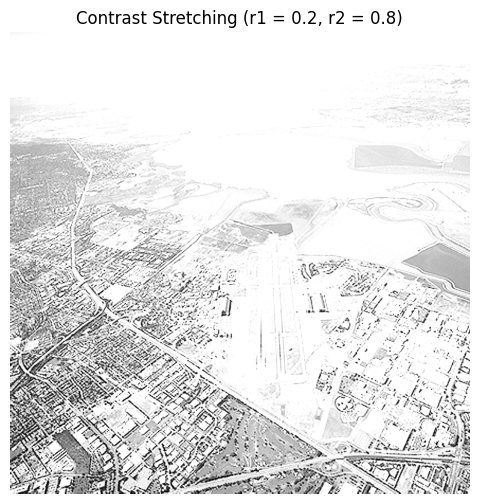

In [11]:
def contrast_stretch(img, r1=0.2, r2=0.8):
    """
    Perform contrast stretching using a piecewise linear transformation.

    Parameters:
    img : Input grayscale image (uint8)
    r1  : Lower threshold (normalized)
    r2  : Upper threshold (normalized)

    Returns:
    Contrast-stretched image (uint8)
    """

    # Normalize image to [0, 1]
    img_norm = img / 255.0

    # Initialize output image
    stretched = np.zeros_like(img_norm)

    # Apply piecewise transformation
    stretched[img_norm < r1] = 0
    stretched[img_norm > r2] = 1

    mask = (img_norm >= r1) & (img_norm <= r2)
    stretched[mask] = (img_norm[mask] - r1) / (r2 - r1)

    # Convert back to [0, 255]
    return (stretched * 255).astype(np.uint8)


# Apply contrast stretching
cs = contrast_stretch(runway)

# Display result
plt.imshow(cs, cmap="gray")
plt.title("Contrast Stretching (r1 = 0.2, r2 = 0.8)")
plt.axis("off")


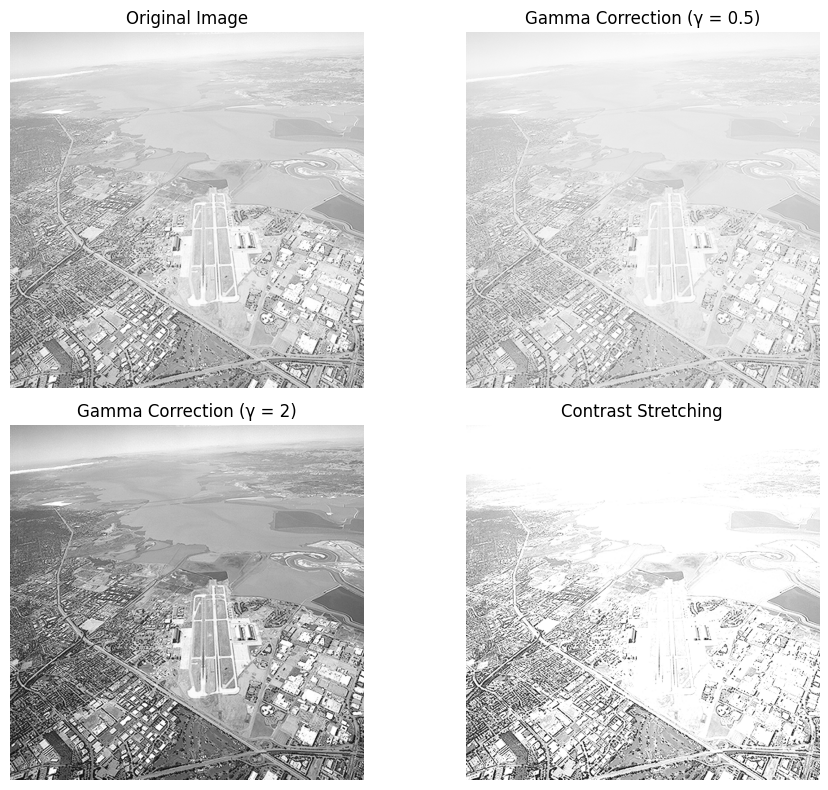

In [12]:
plt.figure(figsize=(10, 8))

# Subplot 1: Original Image
plt.subplot(2, 2, 1)
plt.imshow(runway, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Subplot 2: Gamma = 0.5
plt.subplot(2, 2, 2)
plt.imshow(gamma_05, cmap="gray")
plt.title("Gamma Correction (γ = 0.5)")
plt.axis("off")

# Subplot 3: Gamma = 2
plt.subplot(2, 2, 3)
plt.imshow(gamma_2, cmap="gray")
plt.title("Gamma Correction (γ = 2)")
plt.axis("off")

# Subplot 4: Contrast Stretching
plt.subplot(2, 2, 4)
plt.imshow(cs, cmap="gray")
plt.title("Contrast Stretching")
plt.axis("off")

plt.tight_layout()
plt.show()
